# Case Study: Neurons Inc
## Reproducibility Analysis of Ad Memory and Brand Memory Metric

<i>by Irina White </i>
<i> September 22. 2023</i>

### Objective
1. Explanatory analysis of the dataset provided
2. Reproducibility analysis of the brand recall score. Set up criteria that you think are reasonable to determine how big a sample
should be in order to satisfy the criteria.

Structure of the dataset:
- participant_id - id of the participant.
- file_name - name of the image tested.
- category - category of the brand tested.
- metric - score that we are interested in: the only column with numeric values


### Sections
1. [Exploratory Data Analysis](#cell1)
2. [Exploratory Analysis Summary](#cell2)
3. [Reproducibility Analysis](#cell3)
4. [Reproducibility Analysis Conclusion](#cell4) 

In [1]:
#download libraries
import datatable as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as st
from statsmodels.stats.power import tt_ind_solve_power
sns.set()

***

# <font color='Lightblue'><a id="cell1"></a>Exploratory Data Analysis</font>

1. Download data
2. Understand variables and database structure
3. Visualisation
4. Summary


In [3]:
#download data and overview features
file="case_data.csv"
data=dt.fread(file).to_pandas()
print("Columns Overview:\n", data.describe(include='object'))
print('\nUnique file names:\n', data.file_name.unique())
print('\nUnique category names:\n', data.category.unique())

Columns Overview:
                               participant_id         file_name     category
count                                   6000              6000         6000
unique                                   200                30            3
top     0a90748e-1237-7a4d-4280-40bb4535ec14  Amazon-001_Image  Electronics
freq                                      30               200         2000

Unique file names:
 ['Amazon-001_Image' 'Cheerios-001_Image' 'Heineken-001_Image'
 'Heinz-001_Image' 'Jif-001_Image' 'Kinder-001_Image' 'KitKat-001_Image'
 'Lipton-001_Image' 'Oreo-001_Image' 'Pepsi-001_Image'
 'Snickers-001_Image' 'DKNY-001_Image' 'Lacoste-001_Image'
 'Hermes-001_Image' 'CalvinKlein-001_Image' 'Versace-001_Image'
 'Givenchy-001_Image' 'Celine-001_Image' 'Adidas_001_Image'
 'Fossil-001_Image' 'Gucci-001_Image' 'Intel-001_Image' 'Nokia-001_Image'
 'OnePlus-001_Image' 'Sonos-001_Image' 'Asus-001_Image'
 'BeatsByDre-001_Image' 'Samsung-001_Image' 'Marshall-001_Image'
 'HP-001_Ima

count    6000.000000
mean       12.713889
std        30.835627
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        96.666667
Name: metric, dtype: float64
Total number of non-zero values:  880
Skew value of Metric data:  2.0412556671529534
Unique metric values:  [0.0, 67.0, 70.0, 73.0, 77.0, 80.0, 83.0, 87.0, 90.0, 93.0, 97.0]
Duplicate entries across data set:  0


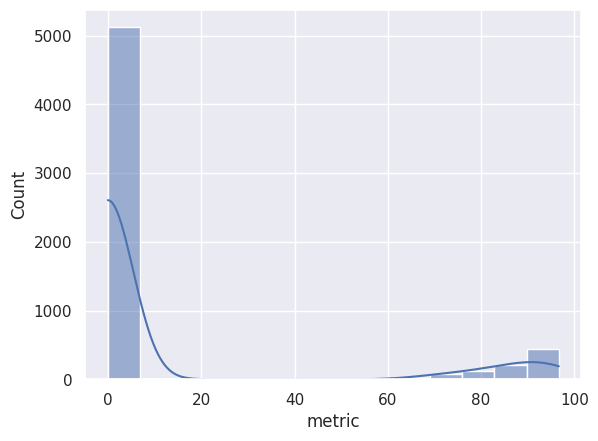

In [4]:
# Visualization of the Metric values distribution.
sns.histplot(x='metric',  data=data, kde=True)
print(data.metric.describe())
print('Total number of non-zero values: ', np.count_nonzero(data.metric))
print('Skew value of Metric data: ', data.metric.skew())
print('Unique metric values: ', sorted(np.round(data.metric.unique())))
print('Duplicate entries across data set: ', sum(data.duplicated()))

In [5]:
# Clean/prepare data:
#file_name to be simplified: each value is stripped of '-011_Image' section
data.file_name=data.file_name.str.rstrip('-001_Image')

#new column id is to be used instead of participant_id UUID values 
id_new=range(1,201)
data['id'] = (data['participant_id'].replace(data.participant_id.unique(), id_new)).astype(str)
data.head(20)

#round metrics
data.metric=np.round(data.metric)

In [6]:
# Estimate the number of questions per brand assigned to each participant
group_by_df=pd.DataFrame()
group_by_df['Brand']=data.groupby(by='id')['file_name'].count()
group_by_df['Category']=data.groupby(by='id')['category'].count()
print('sum by brand: ', group_by_df.Brand.unique())
print('sum by category: ', group_by_df.Category.unique())

sum by brand:  [30]
sum by category:  [30]


### Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

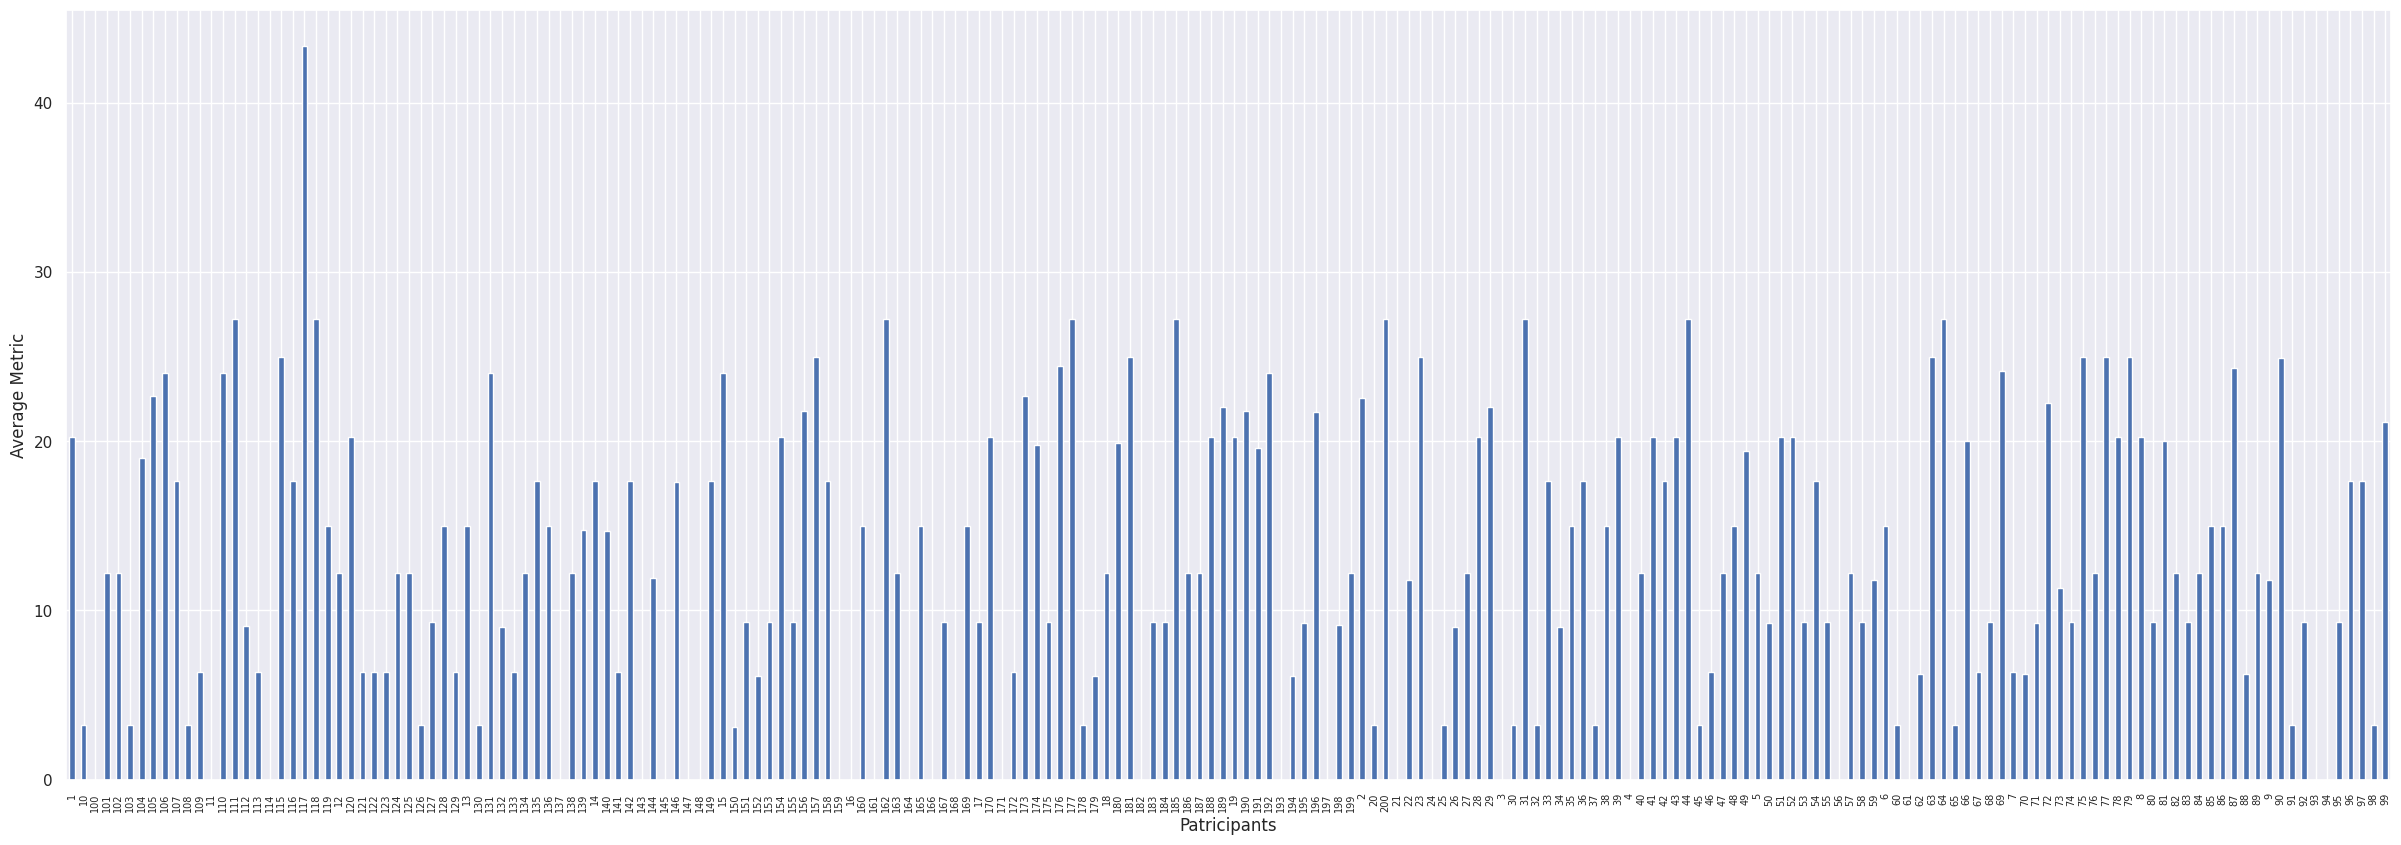

In [7]:
#Visualise comparison of average metric scores among Participants (id)
data.groupby('id')['metric'].mean().plot.bar(figsize=(30, 10))
plt.xlabel('Patricipants')
plt.tick_params(axis='x', which='major', labelsize=7)
plt.ylabel('Average Metric')
plt.show

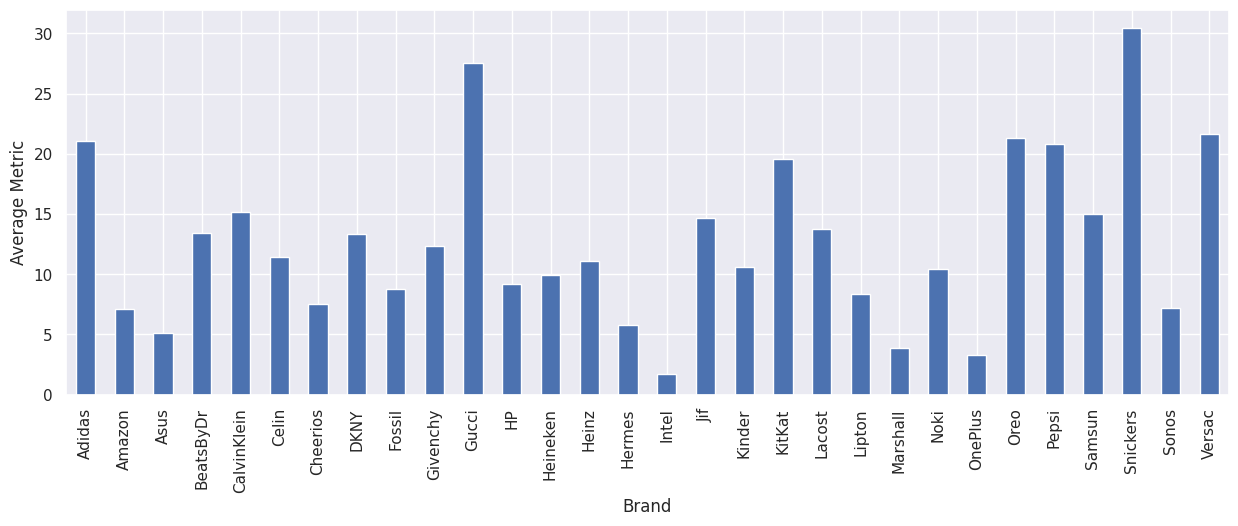

In [8]:
#Visualise comparison of average metric scores among Brand names
data.groupby('file_name')['metric'].mean().plot.bar(figsize=(15, 5))
plt.xlabel('Brand')
plt.ylabel('Average Metric')
plt.show()

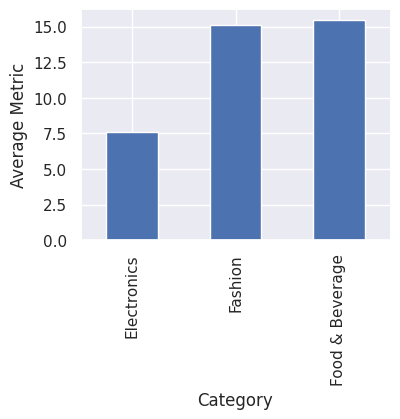

In [9]:
#Visualise comparison of average metric scores among Categories
data.groupby('category')['metric'].mean().plot.bar(figsize=(4, 3))
plt.xlabel('Category')
plt.ylabel('Average Metric')
plt.show()

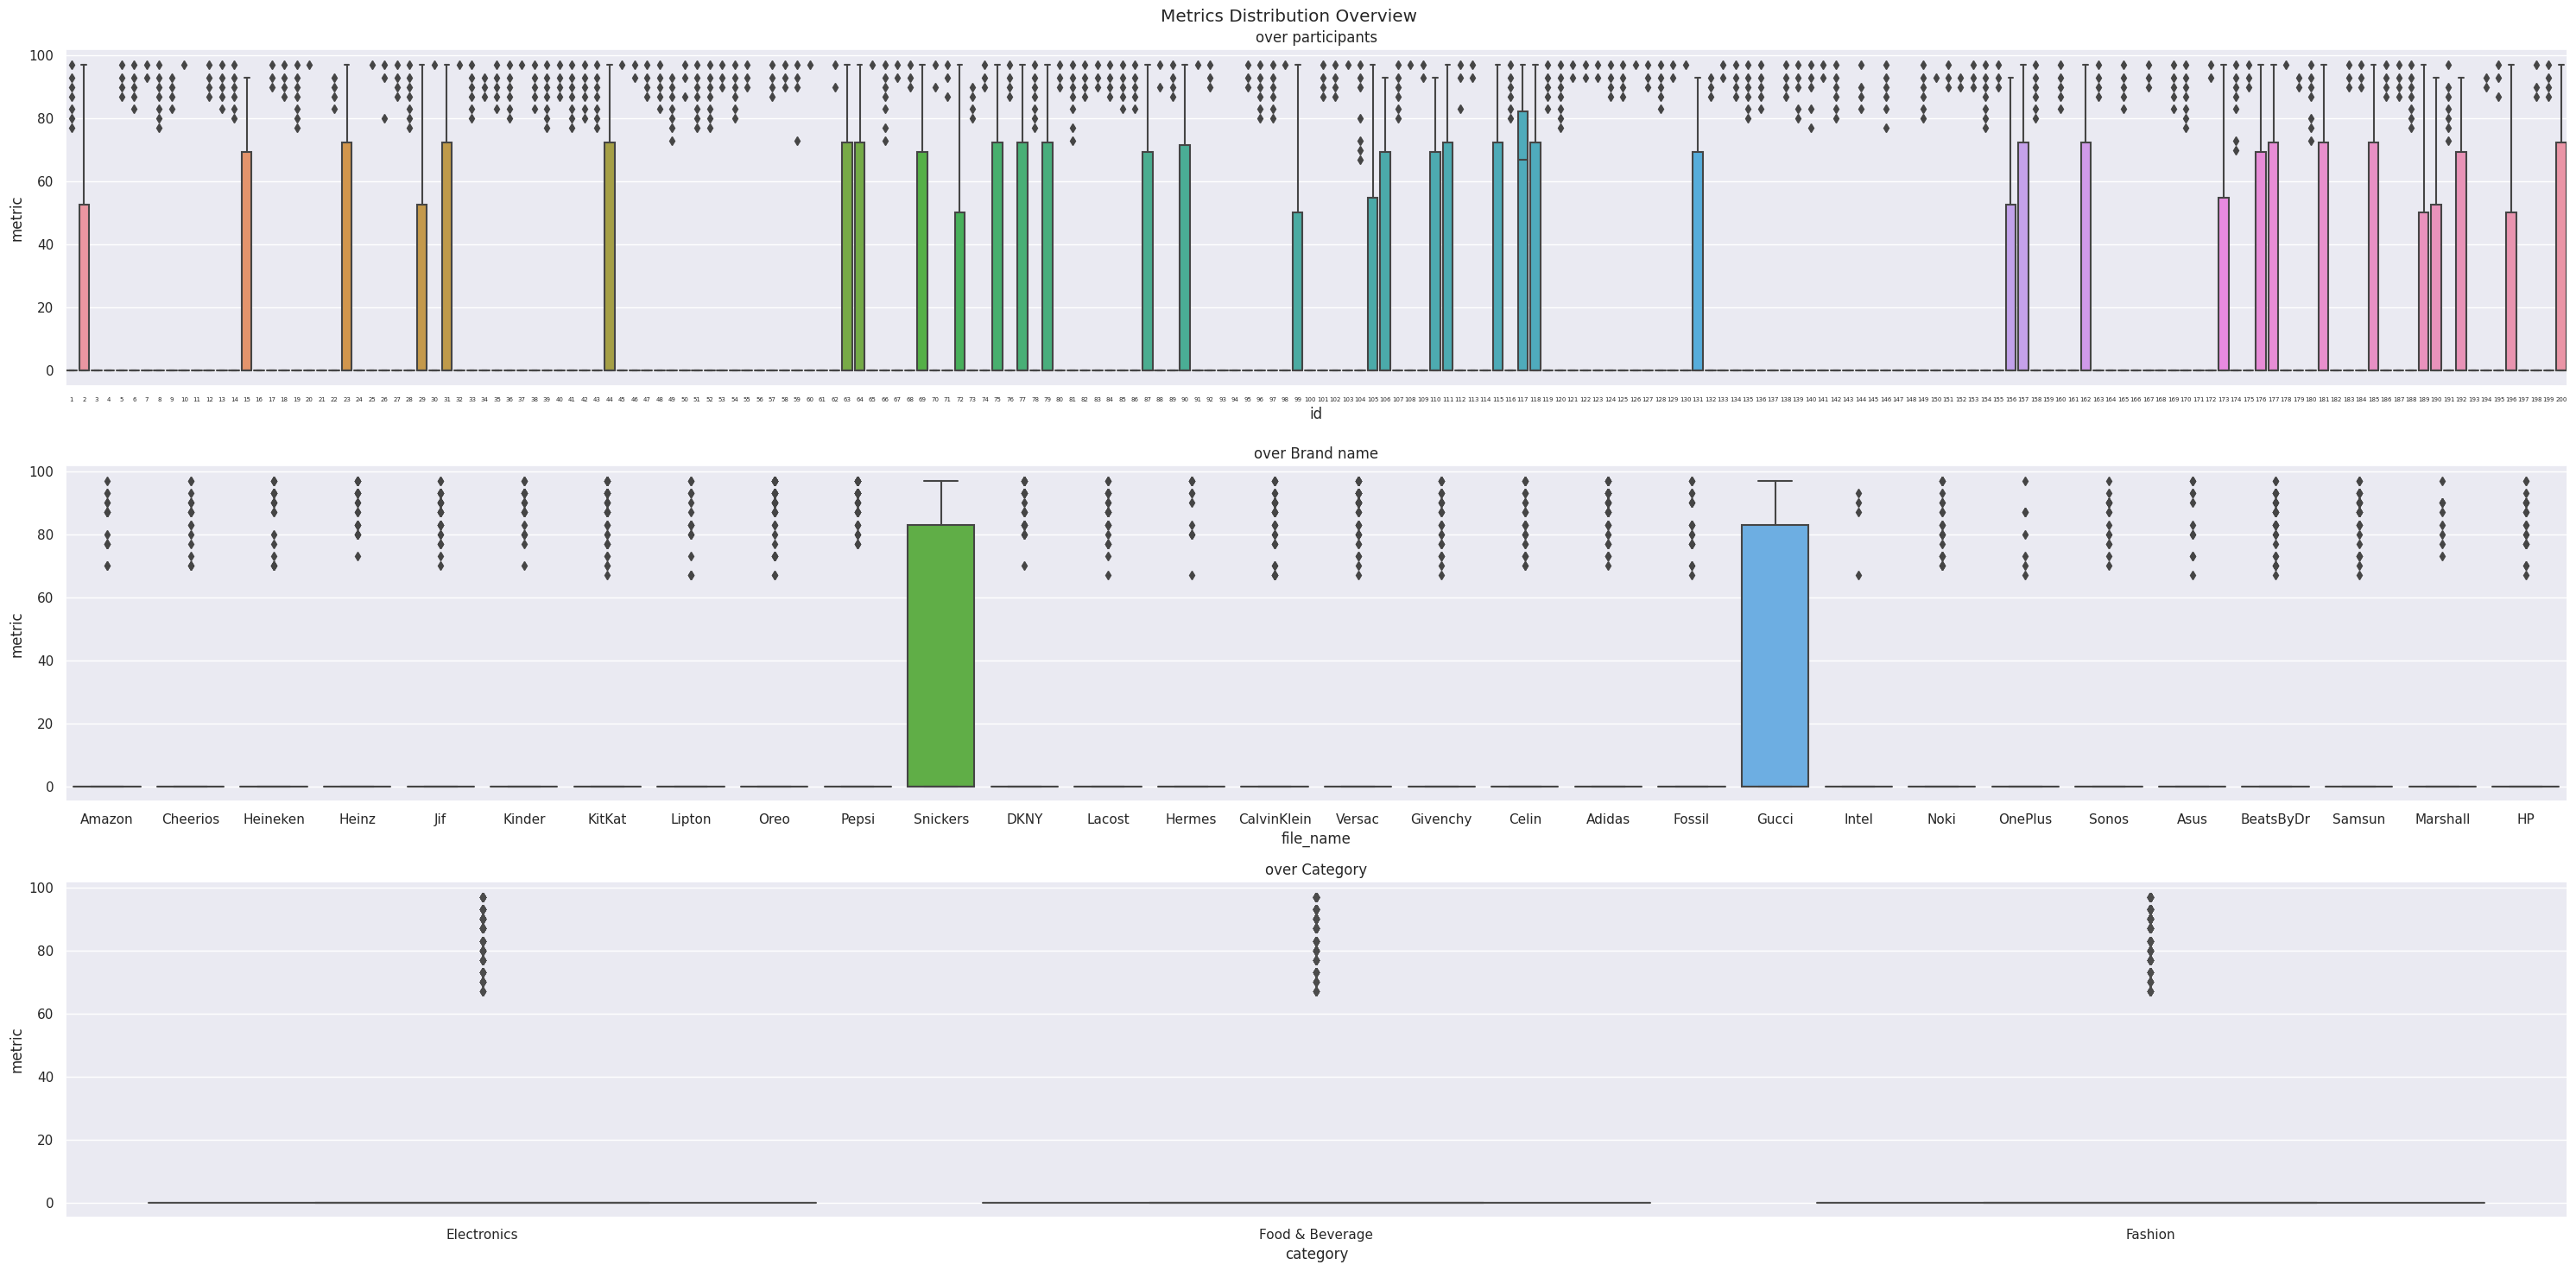

In [10]:
#quick overview of the metrics distribution of the data
fig, axes = plt.subplots(3, 1, figsize=(30, 15))
fig.suptitle('Metrics Distribution Overview')

axes[0].set_title('over participants')
axes[0].tick_params(axis='x', which='major', labelsize=5)
axes[0].set_xlabel(None)
sns.boxplot(ax=axes[0], x='id', y='metric', data=data)

axes[1].set_title('over Brand name')
sns.boxplot(ax=axes[1], x='file_name', y='metric', data=data)

axes[2].set_title('over Category')
sns.boxplot(ax=axes[2], x='category', y='metric', data=data)

plt.tight_layout()

Skew value of initial data:  2.0415323872282434
Skew value of non-zero data:  -0.6512180061859025


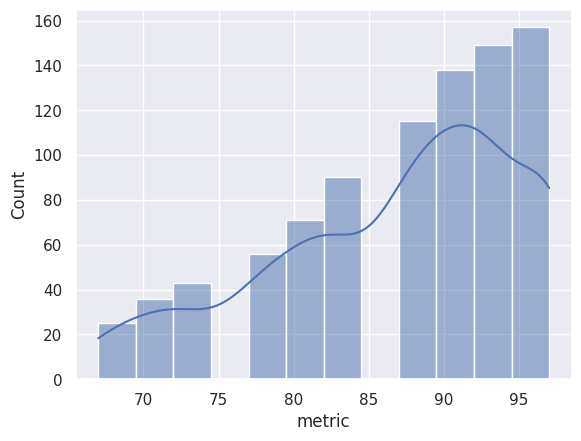

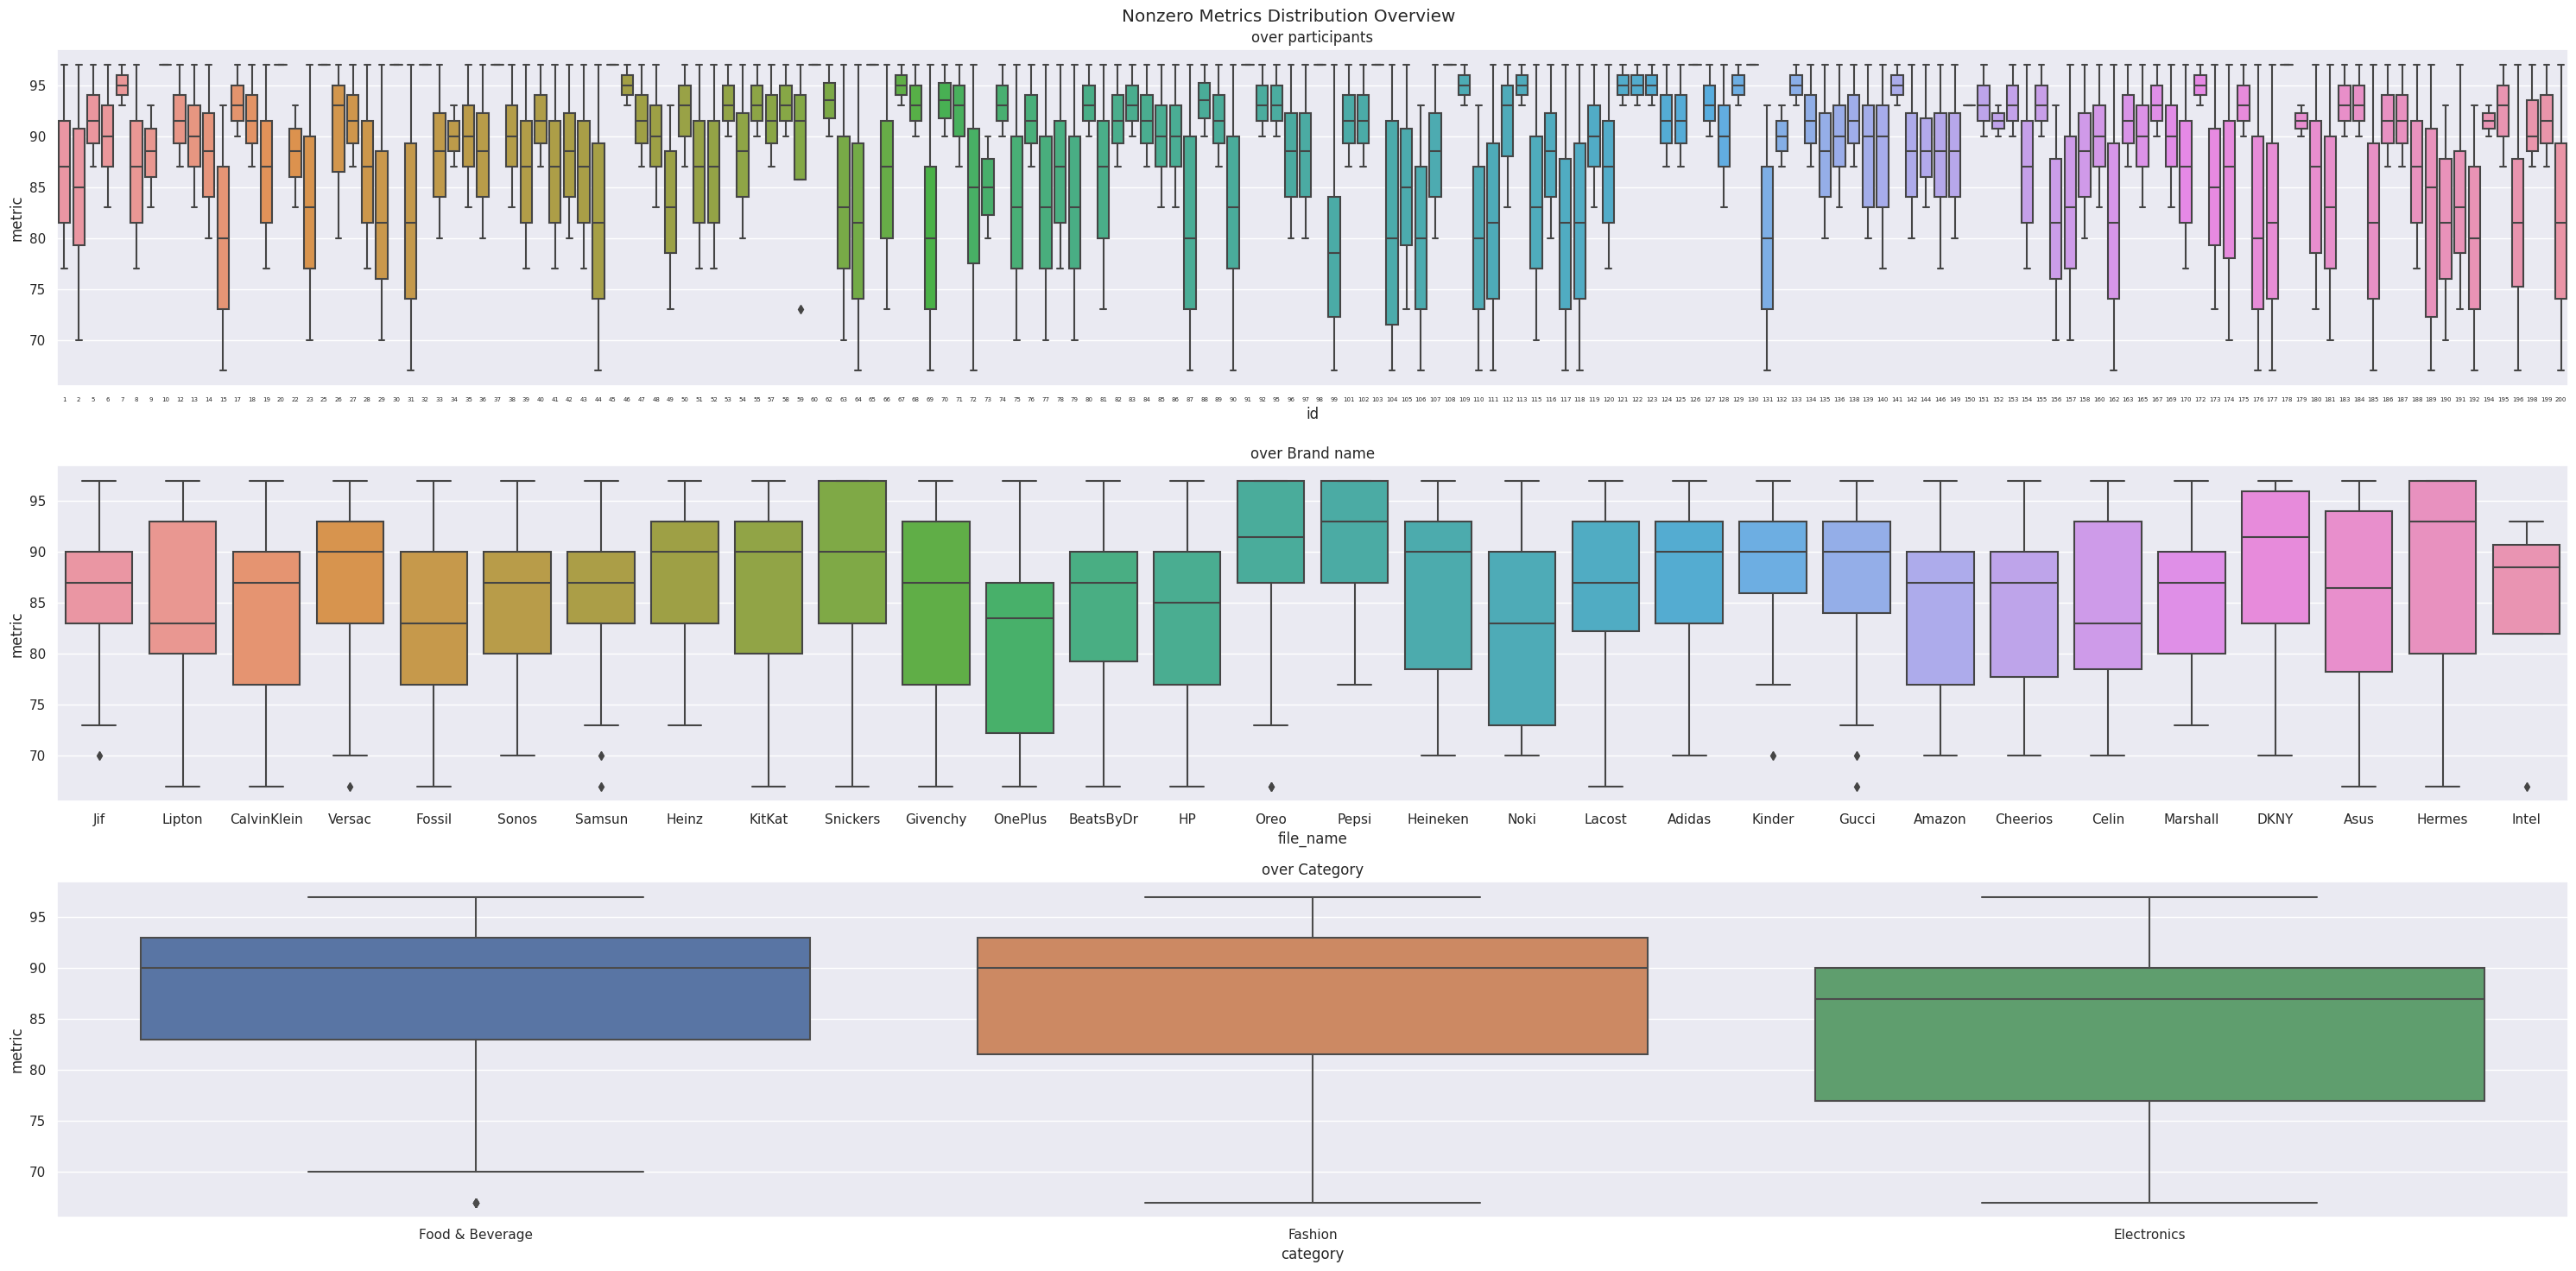

In [11]:
#Overview of the metrics distribution of the data if all zero values are to be eliminated
data_nonzero=data[data['metric']!=0]
print('Skew value of initial data: ', data.metric.skew())
print('Skew value of non-zero data: ', data_nonzero.metric.skew())


sns.histplot(x='metric',  data=data_nonzero, kde=True)

fig, axes = plt.subplots(3, 1, figsize=(30, 15))
fig.suptitle('Nonzero Metrics Distribution Overview')

axes[0].set_title('over participants')
axes[0].tick_params(axis='x', which='major', labelsize=5)
sns.boxplot(ax=axes[0], x='id', y='metric', data=data_nonzero)

axes[1].set_title('over Brand name')
sns.boxplot(ax=axes[1], x='file_name', y='metric', data=data_nonzero)

axes[2].set_title('over Category')
sns.boxplot(ax=axes[2], x='category', y='metric', data=data_nonzero)

plt.tight_layout()

## <font color='Lightblue'><a id="cell2"></a>Exploratory Analysis Summary</font>

### Data obersvations and assumptions
* There are 200 participants in the study.
* Each participant gets 30 questions.
* Based on the metric column analysis, the assumption is that question results have discrete assigned values: 0, 67, 70, 73, 77, 80, 83, 87, 90, 93, 97
* The metric evaluation system reminds of a GPA percent grade system (*might be irrelevant).
* There are 5120 zero metric values, which correspond to  85.33% of the scores.
* <i>Assumption:</i> Zero values are significant for this analysis as they mean lack of brand awarness/memory and not missing entries, insignificant or irrelevant points, errors.
* The visualisation of the metrics showed that there are still noticable variance of means among participants, brand or categories; this stregnthen the above assumption.
* The equal number of results (metric scores) per perticipant per brand and per category supports the assumption as well.
* If zero values are eliminated the skewnewss of data is significantly diminished: 
&#9685; overall metric data is positively skewed with the value of 2. Due to large number of zero entries.
&#9685; non-zero metric data is only slightly negatively skewed with the value of -0.6. However this data can be further transformed using coxbox or log transformation to represent normal distribution.
* Analysis also shows that the most recalles brands are: Snickers and Gucci, while Oreo, Pepsi and Hermes are closely followed the above once the zero values are eliminated (aka: if you know it, you KNOW IT)
* The least recalled brands before and after the zero values dropped are: Intel, Marshal, and OnePlus.
 &#9685; Intel is an interesting brand, it has no low quartile (left whisker is not present), making low quartile of 25% to be minimum.
 * As for the categories: electronis brands are not as good to leave recall memorey as Food&Bevarage or Fashion category brands.
 * There are 37 participants that showed wider brand recollection abilities (more diverse recollection scores) than the rest of the subjects.


***


## <font color='Lightblue'><a id="cell3"></a>Reproducibility Analysis</font>

1. Metric of Interest: brand recall score<br><br>
2. Context: memore analysis, initial population size (first group): 6000, missing info: metrics calculation/application.<br><br>
3. Reproducibility Criteria:
- Margin of error, the basic evaluation based on the acceptable deviation.<br>
- Minimum Correlation Coefficient: r = 0.03, 0.05, 0.08 <br>
We are to calculate the correlation coefficient between the brand recall metric score: it is an assumption that given r value is safe threshold for the correlation coefficient to consider the results reproducible.<br>
- Intra-class Correlation (ICC):<br>
ICC measures the consistency or reliability of measurements across different trials. Can be applied if viewed different brand as clusters<br>
- Cohen's D effect size used for T test sample size estimate<br>
4. Summary

In [12]:
pivot_id_brand_df=data[['id','file_name','metric']]
pivot_id_brand_df= pivot_id_brand_df.pivot(index='file_name', columns='id')
pivot_id_brand_df = pivot_id_brand_df['metric'].reset_index()
pivot_id_brand_df.columns.name = None
pivot_id_brand_df.rename(columns = {'file_name':'brand'}, inplace = True)
pivot_id_brand_df.set_index('brand', inplace=True)
pivot_id_brand_df['recall_mean'] = pivot_id_brand_df.mean(axis=1)
pivot_id_brand_df['recall_stdev'] = pivot_id_brand_df.std(axis=1)
pivot_id_brand_df['effect_size'] = (pivot_id_brand_df['recall_mean'] - 12.717833) / pivot_id_brand_df['recall_stdev']
pivot_id_brand_df

,1,10,100,101,102,103,104,105,106,107,...,93,94,95,96,97,98,99,recall_mean,recall_stdev,effect_size
brand,,,,,,,,,,,,,,,,,,,,,
Adidas,0.0,0.0,0.0,97.0,0.0,0.0,0.0,93.0,73.0,0.0,...,0.0,0.0,90.0,0.0,0.0,0.0,0.0,21.080,37.686252,0.221889
Amazon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,77.0,7.130,23.505384,-0.237726
Asus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.115,20.399553,-0.372696
BeatsByDr,0.0,0.0,0.0,0.0,87.0,0.0,67.0,0.0,83.0,0.0,...,0.0,0.0,97.0,87.0,0.0,0.0,0.0,13.430,30.961671,0.023002
CalvinKlein,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.140,32.573922,0.074359
Celin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,80.0,0.0,...,0.0,0.0,0.0,0.0,97.0,0.0,87.0,11.450,29.161576,-0.043476
Cheerios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,80.0,7.555,24.162305,-0.213673
DKNY,0.0,0.0,0.0,93.0,0.0,0.0,97.0,83.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.365,31.929638,0.020269
Fossil,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.770,25.768529,-0.153204


In [13]:
print('Mean st.dev: ', pivot_id_brand_df.recall_stdev.mean())
print('Mean of the means: ', pivot_id_brand_df.recall_mean.mean())
print('Mean of effect_size: ', pivot_id_brand_df.effect_size.mean())

Mean st.dev:  29.153826738671718
Mean of the means:  12.717833333333337
Mean of effect_size:  -0.06934798089230802


In [14]:
# Margin of error, based on the 200 previous participants being an estimate for population and margin on error set at 0.05.
def solvin_formula_samplesize(N):
    size=(N/(1+N*0.05**2))
    return size
print('sample size: ', np.round(solvin_formula_samplesize(200),0))

sample size:  133.0


In [15]:
# Minimum correlation coefficient
def correlation_sample_size(alpha, beta, r):
   
    C = 0.5*(np.log((1+r)/(1-r)))
    Z_alpha = st.norm.sf(abs(alpha/2))*2
    Z_beta = st.norm.sf(abs(1-beta))*2
    size_r=pow((Z_alpha+Z_beta)/C,2)+3

    return size_r
# result for significance value set at 0.05, power value at 0.8 and r have a range of values
print('For r of 0.3, 0.5, 0.8 respectively we get: ', np.round([correlation_sample_size(0.05, 0.8, i) for i in [0.03, 0.05, 0.07]],0))



For r of 0.3, 0.5, 0.8 respectively we get:  [3687. 1328.  678.]


In [16]:
# Clustered Data correlation
# from  https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1a-epidemiology/clustered-data

  # ICC - intraclass correlation coefficient
  # m - number of subjects
  # n - average cluster size is the same as m
  # k - number of clusters

def clustered_size(m, k, n, ICC):
    
    DE = 1 + (n-1) * ICC
    sample_size_cluster = (m * k) / DE 
    return sample_size_cluster

df=data[['file_name','id','metric']]
icc = pg.intraclass_corr(data=df, targets='file_name', raters='id', ratings='metric')
print(icc.set_index('Type').iloc[:3][['Description', 'ICC', 'pval']])

print('\nEstimated sample_size based on intracluster correlation: ',np.round(clustered_size(200, 30, 200, 0.05),0))

                 Description       ICC          pval
Type                                                
ICC1  Single raters absolute  0.047402  7.955129e-49
ICC2    Single random raters  0.047621  8.143909e-52
ICC3     Single fixed raters  0.049916  8.143909e-52

Estimated sample_size based on intracluster correlation:  548.0


In [17]:
# T-test mean comparisons
# efsize: we use Cohen's d: divide the mean difference by the standard deviation of the difference
# sd(x-mu) = sd(x) .

n = tt_ind_solve_power(effect_size=-0.07, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
print('Sample size: ', np.round(n, 0))

Sample size:  3205.0


## <font color='Lightblue'><a id="cell4"></a>Reproducibility Analysis Conclusion</font>

The provided data set and metrics were evaluated under the assumptions that: 
- zero values are significant;
- the study been done with 200 random subjects that had to evaluate 30 brand related pictures/logos;
- the metrics are numerical values, however one can assume that results can be considered categorical as well

<b><br>Samples sizes:</b>
- Margin of error: 133 participants; which is 133 * 30 = <b> 3990</b> data points <br><br>
- Minimum Correlation Coefficient: for r of 0.3, 0.5, 0.8 respectively 3687, 1328, 678 <br><br>
- Intra-class Correlation (ICC = 0.05): 548. This is an odd one and a severe underestimate.
- Mean of Cohen's D effect size used in t test: 3205   <br><br>

Therefore, the proposed (safe) estimated sample size for the replicated study: <font color='orange'><i>3900 entry points or 130 participants</i></font>